# Explore the plankton dataset

## Import libraries

In [1]:
from scivision.io import load_pretrained_model, load_dataset

In [2]:
cat = load_dataset('https://github.com/alan-turing-institute/plankton-dsg-challenge')

In [3]:
type(cat)

intake.catalog.local.YAMLFileCatalog

In [4]:
ds = cat.plankton_multiple().to_dask()

In [5]:
type(ds)

xarray.core.dataset.Dataset

In [6]:
# choose a test image
image_no = 30
image = ds['raster'].sel(concat_dim=image_no).compute().values

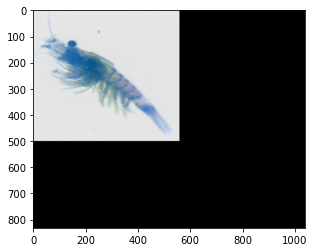

In [7]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [8]:
%%capture
# Load model
scivision_yml = 'https://github.com/quantumjot/scivision-test-plugin/.scivision-config_imagenet.yaml'
model = load_pretrained_model(scivision_yml, allow_install=True)

2021-11-29 19:48:42.247118: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-29 19:48:42.247197: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ostrickson1): /proc/driver/nvidia/version does not exist
2021-11-29 19:48:42.248004: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# let's explore the model object
model

scivision.PretrainedModel( 
  module='scivision_test_plugin', 
  model='ImageNetModel', 
  source='https://github.com/quantumjot/scivision-test-plugin.git' 
  pipe='DataPipe(input=<Parameter "X: numpy.ndarray">, output=<Parameter "image: numpy.ndarray">)' 
)

In [10]:
# libraries
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [11]:
# resize image
IMAGE = resize(image, (224, 224)) * 255  # cast back to 0-255 range

In [12]:
# Get model predicition of image
pred = model.predict(IMAGE)

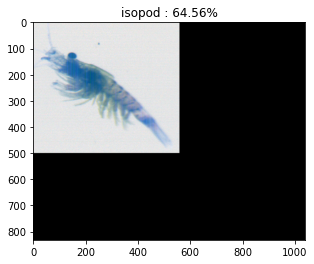

In [13]:
plt.figure()
plt.imshow(image)
_, image_class, class_confidence = decode_predictions(pred, top=1)[0][0]
plt.title("{} : {:.2f}%".format(image_class, class_confidence * 100))
plt.show()